In [20]:
import sys
print (sys.version)

2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


In [21]:
import numpy as np
import pandas as pd
properties_file = '../input/properties_2016.csv'
training_file = '../input/train_2016_v2.csv'
properties = pd.read_csv(properties_file, dtype={
    'fireplaceflag': np.bool, 'hashottuborspa': np.bool,
    'propertycountylandusecode': np.str,
    'propertyzoningdesc': np.str}, converters={
    'taxdelinquencyflag': lambda x: np.bool(True) if x == 'Y' else np.bool(False)})  # avoid mixed type warning
print ('loaded properties from ' + properties_file)
print ('properties shape: ' + str(properties.shape))
train = pd.read_csv(training_file)
print ('loaded transaction data from ' + training_file)
print ('train shape: ' + str(train.shape))

loaded properties from ../input/properties_2016.csv
properties shape: (2985217, 58)
loaded transaction data from ../input/train_2016_v2.csv
train shape: (90275, 3)


In [22]:
# take the log of select columns to reduce skew

log_columns = ['landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'taxamount', 'taxvaluedollarcnt',
               'calculatedfinishedsquarefeet']
properties[log_columns].describe()

,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.917484e+06,2.930235e+06,2.953967e+06,2.942667e+06,2.929652e+06
mean,2.524780e+05,1.708836e+05,5.377607e+03,4.204790e+05,1.827162e+03
std,4.450132e+05,4.020683e+05,9.183107e+03,7.263467e+05,1.819780e+03
min,1.000000e+00,1.000000e+00,1.340000e+00,1.000000e+00,1.000000e+00
25%,7.483600e+04,7.480000e+04,2.461070e+03,1.796750e+05,1.213000e+03
50%,1.670420e+05,1.225900e+05,3.991780e+03,3.060860e+05,1.572000e+03
75%,3.069180e+05,1.968890e+05,6.201005e+03,4.880000e+05,2.136000e+03
max,9.024622e+07,2.514860e+08,3.458861e+06,2.827860e+08,9.525760e+05


In [27]:
for column_name in log_columns:
    properties[column_name] = properties[column_name].apply(lambda x: np.log(x) if pd.notnull(x) else x)
properties[log_columns].describe()

,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.917484e+06,2.930235e+06,2.953967e+06,2.942667e+06,2.929652e+06
mean,-inf,-inf,2.102477e+00,-inf,-inf
std,NaN,NaN,1.110479e-01,NaN,NaN
min,-inf,-inf,-1.228711e+00,-inf,-inf
25%,2.417970e+00,2.417927e+00,2.055194e+00,2.493115e+00,1.960215e+00
50%,2.487071e+00,2.461007e+00,2.115290e+00,2.536203e+00,1.996074e+00
75%,2.536418e+00,2.500648e+00,2.167048e+00,2.572465e+00,2.036885e+00
max,2.907887e+00,2.962325e+00,2.711806e+00,2.968371e+00,2.622269e+00


,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.917474e+06,2.930217e+06,2.953958e+06,2.942660e+06,2.929639e+06
mean,9.031419e-01,8.978513e-01,7.416085e-01,9.259766e-01,6.923068e-01
std,5.097078e-02,3.376917e-02,5.634309e-02,4.424445e-02,3.062366e-02
min,-2.363952e+00,-1.118914e+00,-7.373869e-01,-2.363952e+00,-2.363952e+00
25%,8.829284e-01,8.829106e-01,7.203707e-01,9.135329e-01,6.730540e-01
50%,9.111059e-01,9.005705e-01,7.491921e-01,9.306682e-01,6.911823e-01
75%,9.307529e-01,9.165500e-01,7.733659e-01,9.448646e-01,7.114217e-01
max,1.067427e+00,1.085975e+00,9.976150e-01,1.088013e+00,9.640400e-01


,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.915015e+06,2.929847e+06,2.953780e+06,2.940501e+06,2.929623e+06
mean,-1.017508e-01,-1.082217e-01,-3.022449e-01,-7.670923e-02,-3.686669e-01
std,4.406271e-02,3.629222e-02,8.834117e-02,4.341197e-02,4.407504e-02
min,-2.820523e+00,-1.639839e+00,-5.799007e+00,-3.932821e+00,-2.377835e+00
25%,-1.243798e-01,-1.245190e-01,-3.279806e-01,-9.037030e-02,-3.959297e-01
50%,-9.305836e-02,-1.047240e-01,-2.887557e-01,-7.184095e-02,-3.693517e-01
75%,-7.175193e-02,-8.713660e-02,-2.570005e-01,-5.670500e-02,-3.404899e-01
max,6.525081e-02,8.247778e-02,-2.387843e-03,8.435351e-02,-3.662252e-02


In [27]:
# these are either one value or null, so we can tell the model that they're Boolean

true_false_columns = ['hashottuborspa','fireplaceflag']
properties[true_false_columns].describe()

,hashottuborspa,fireplaceflag
count,69014,5163
unique,1,1
top,True,True
freq,69014,5163


In [28]:
for column_name in true_false_columns:
    properties[column_name] = properties[column_name].apply(lambda x: False if pd.isnull(x) else True)
properties[true_false_columns].describe()

,hashottuborspa,fireplaceflag
count,2985217,2985217
unique,2,2
top,False,False
freq,2916203,2980054


In [29]:
# transform tax delinquency year
print('unique tax delinquency year values: ' + str(properties['taxdelinquencyyear'].unique()))

unique tax delinquency year values: [ nan  13.  15.  11.  14.   9.  10.   8.  12.   7.   6.   2.  92.   5.   3.
   4.  95.  91.  93.  98.  82.  79.  94.  97.  90.  99.   0.   1.  87.  84.
  86.  88.  96.]


In [30]:
properties['taxdelinquencyyear'] = properties['taxdelinquencyyear'].apply(
    lambda x: (17 - x if x < 20 else 117 - x) if pd.notnull(x) else x)

In [31]:
print('unique tax delinquency year values: ' + str(properties['taxdelinquencyyear'].unique()))

unique tax delinquency year values: [ nan   4.   2.   6.   3.   8.   7.   9.   5.  10.  11.  15.  25.  12.  14.
  13.  22.  26.  24.  19.  35.  38.  23.  20.  27.  18.  17.  16.  30.  33.
  31.  29.  21.]


In [32]:
# scale the latitude and longitude using the min-max scaler
location_columns = ['latitude', 'longitude']
properties[location_columns].describe()

,latitude,longitude
count,2.973780e+06,2.973780e+06
mean,3.400147e+07,-1.182019e+08
std,2.433812e+05,3.453171e+05
min,3.332439e+07,-1.194758e+08
25%,3.382768e+07,-1.183930e+08
50%,3.400825e+07,-1.181725e+08
75%,3.416186e+07,-1.179495e+08
max,3.481965e+07,-1.175543e+08


In [33]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(copy=True)
scaled_columns = list()
for column_name in location_columns:
    mean_value = properties[column_name].mean()
    properties[column_name].fillna(inplace=True, value=mean_value)
    scaled_columns.append(column_name)
properties[scaled_columns] = min_max_scaler.fit_transform(properties[scaled_columns])
properties[location_columns].describe()

,latitude,longitude
count,2.985217e+06,2.985217e+06
mean,4.528174e-01,6.629559e-01
std,1.624562e-01,1.793710e-01
min,0.000000e+00,0.000000e+00
25%,3.369858e-01,5.640387e-01
50%,4.564712e-01,6.773080e-01
75%,5.597367e-01,7.939581e-01
max,1.000000e+00,1.000000e+00


In [34]:
# label encoding for several coded features
from sklearn.preprocessing import LabelEncoder
label_encode_columns = ['propertycountylandusecode', 'propertyzoningdesc', 'fips', 'regionidzip']
for column_name in label_encode_columns:
    if column_name in ['fips', 'regionidzip']:
        properties[column_name] = properties[column_name].fillna('ZZZ')
    label_encoder = LabelEncoder()
    label_encoder.fit(list(properties[column_name].values))
    properties[column_name] = label_encoder.transform(list(properties[column_name].values))

In [35]:
print (properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottubor

In [36]:
# finally drop columns earlier model runs have told us are not significant

properties = properties.drop(
    [
        'regionidcounty',
        'assessmentyear',
        'fireplaceflag',
        'pooltypeid10',
        'storytypeid',
        'typeconstructiontypeid'
    ], axis=1)
print (properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 52 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottubor

In [37]:
# merge the properties and transaction data to get the traiing data
train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
test_columns_to_drop = ['parcelid']
x_test = properties.drop(test_columns_to_drop, axis=1)
print ('train shape: %s, test shape: %s' % ((x_train.shape,), (x_test.shape,)))

train shape: ((90275, 51),), test shape: ((2985217, 51),)


In [38]:
# filter outliers 
lower_limit = -0.4
upper_limit = 0.5
train_df = train_df[(train_df.logerror < upper_limit) & (train_df.logerror > lower_limit)]
print ('after outlier filtering, train shape: %s, test shape: %s' % ((train_df.shape,), (x_test.shape,)))

after outlier filtering, train shape: ((88799, 54),), test shape: ((2985217, 51),)


In [41]:
# build the XGBoost matrices and get the log-error mean
import xgboost as xgb

train_columns_to_drop = ['parcelid', 'logerror', 'transactiondate'] 
x_train = train_df.drop(train_columns_to_drop, axis=1)
y_train = train_df['logerror'].values.astype(np.float32)
y_mean = np.mean(y_train)
print ('y_train shape: %s' % (y_train.shape,))
print ('y_mean (the XGBoost base score) = %.6f' % y_mean)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

y_train shape: (88799,)
y_mean (the XGBoost base score) = 0.009000


In [42]:
# xgboost parameters
random_seed = 1
xgboost_parameters = {
    'alpha': 0.0,
    'base_score': y_mean,
    'booster': 'gbtree',
    'colsample_bytree': 1.0,
    'eta': 0.025,  #  default = 0.03 
    'eval_metric': 'mae',
    'gamma': 0.0,  # default is 0
    'lambda': 1.05,  # default is 1.0
    'max_depth': 7,  #  default = 6
    'objective': 'reg:linear',
    'seed': random_seed,
    'silent': 1,
    'subsample': 0.7
}

In [43]:
# cross-validation
cross_validation_nfold = 8
xgb_boost_rounds = 1200

cv_result = xgb.cv(xgboost_parameters, dtrain,
                   early_stopping_rounds=100, 
                   nfold=cross_validation_nfold,
                   num_boost_round=xgb_boost_rounds,
                   seed=random_seed,
                   show_stdv=False,
                   verbose_eval=5)
actual_boost_rounds = len(cv_result)

[0]	train-mae:0.0545467	test-mae:0.0545604


[5]	train-mae:0.0543419	test-mae:0.0544299


[10]	train-mae:0.0541683	test-mae:0.0543294


[15]	train-mae:0.0540206	test-mae:0.0542487


[20]	train-mae:0.0538866	test-mae:0.0541883


[25]	train-mae:0.053772	test-mae:0.0541451


[30]	train-mae:0.0536715	test-mae:0.0541064


[35]	train-mae:0.0535786	test-mae:0.0540785


[40]	train-mae:0.0534919	test-mae:0.0540557


[45]	train-mae:0.0534104	test-mae:0.0540326


[50]	train-mae:0.0533382	test-mae:0.0540154


[55]	train-mae:0.0532675	test-mae:0.054001


[60]	train-mae:0.0532069	test-mae:0.053989


[65]	train-mae:0.0531439	test-mae:0.0539778


[70]	train-mae:0.053085	test-mae:0.0539653


[75]	train-mae:0.053033	test-mae:0.053957


[80]	train-mae:0.0529857	test-mae:0.0539514


[85]	train-mae:0.0529372	test-mae:0.0539476


[90]	train-mae:0.052885	test-mae:0.0539405


[95]	train-mae:0.0528424	test-mae:0.0539323


[100]	train-mae:0.0527981	test-mae:0.053928


[105]	train-mae:0.0527533	test-mae:0.0539257


[110]	train-mae:0.052713	test-mae:0.0539218


[115]	train-mae:0.0526721	test-mae:0.0539175


[120]	train-mae:0.0526317	test-mae:0.0539134


[125]	train-mae:0.0525976	test-mae:0.0539102


[130]	train-mae:0.0525595	test-mae:0.05391


[135]	train-mae:0.0525241	test-mae:0.0539085


[140]	train-mae:0.052486	test-mae:0.0539046


[145]	train-mae:0.0524518	test-mae:0.0539018


[150]	train-mae:0.0524177	test-mae:0.0538983


[155]	train-mae:0.0523809	test-mae:0.0538984


[160]	train-mae:0.052345	test-mae:0.0538954


[165]	train-mae:0.0523151	test-mae:0.0538952


[170]	train-mae:0.0522795	test-mae:0.053894


[175]	train-mae:0.0522492	test-mae:0.0538936


[180]	train-mae:0.0522139	test-mae:0.0538924


[185]	train-mae:0.0521819	test-mae:0.0538928


[190]	train-mae:0.0521438	test-mae:0.053894


[195]	train-mae:0.0521117	test-mae:0.0538932


[200]	train-mae:0.0520795	test-mae:0.0538939


[205]	train-mae:0.0520469	test-mae:0.0538928


[210]	train-mae:0.052016	test-mae:0.053896


[215]	train-mae:0.0519846	test-mae:0.0538962


[220]	train-mae:0.0519501	test-mae:0.0538973


[225]	train-mae:0.0519182	test-mae:0.0538995


[230]	train-mae:0.0518878	test-mae:0.0539016


[235]	train-mae:0.0518564	test-mae:0.0539044


[240]	train-mae:0.0518275	test-mae:0.0539041


[245]	train-mae:0.0517979	test-mae:0.0539045


[250]	train-mae:0.0517716	test-mae:0.0539064


[255]	train-mae:0.0517405	test-mae:0.0539068


[260]	train-mae:0.0517039	test-mae:0.0539059


[265]	train-mae:0.0516747	test-mae:0.0539065


[270]	train-mae:0.0516473	test-mae:0.0539084


[275]	train-mae:0.0516166	test-mae:0.0539081


[280]	train-mae:0.0515881	test-mae:0.053907


In [44]:
print('for cross-validation we actually used %d rounds' % actual_boost_rounds)

for cross-validation we actually used 184 rounds


In [45]:
watchlist = [(dtrain, 'train')]
model = xgb.train(dict(xgboost_parameters, silent=1), dtrain=dtrain, num_boost_round=actual_boost_rounds,
                  evals=watchlist)
print ('model trained.')

[0]	train-mae:0.054546


[1]	train-mae:0.054505


[2]	train-mae:0.054463


[3]	train-mae:0.054425


[4]	train-mae:0.054388


[5]	train-mae:0.054349


[6]	train-mae:0.054312


[7]	train-mae:0.054275


[8]	train-mae:0.054241


[9]	train-mae:0.05421


[10]	train-mae:0.054176


[11]	train-mae:0.05414


[12]	train-mae:0.054108


[13]	train-mae:0.054081


[14]	train-mae:0.054054


[15]	train-mae:0.054025


[16]	train-mae:0.054001


[17]	train-mae:0.053977


[18]	train-mae:0.053955


[19]	train-mae:0.053932


[20]	train-mae:0.053905


[21]	train-mae:0.053883


[22]	train-mae:0.053859


[23]	train-mae:0.053834


[24]	train-mae:0.053816


[25]	train-mae:0.053796


[26]	train-mae:0.053775


[27]	train-mae:0.053756


[28]	train-mae:0.053735


[29]	train-mae:0.053712


[30]	train-mae:0.053693


[31]	train-mae:0.053673


[32]	train-mae:0.053659


[33]	train-mae:0.053643


[34]	train-mae:0.053627


[35]	train-mae:0.05361


[36]	train-mae:0.053596


[37]	train-mae:0.053578


[38]	train-mae:0.053561


[39]	train-mae:0.053544


[40]	train-mae:0.053526


[41]	train-mae:0.053512


[42]	train-mae:0.053498


[43]	train-mae:0.05348


[44]	train-mae:0.053462


[45]	train-mae:0.053453


[46]	train-mae:0.053434


[47]	train-mae:0.053419


[48]	train-mae:0.053404


[49]	train-mae:0.053393


[50]	train-mae:0.053383


[51]	train-mae:0.05337


[52]	train-mae:0.053353


[53]	train-mae:0.05334


[54]	train-mae:0.05333


[55]	train-mae:0.053318


[56]	train-mae:0.053301


[57]	train-mae:0.053292


[58]	train-mae:0.053282


[59]	train-mae:0.053271


[60]	train-mae:0.05326


[61]	train-mae:0.05325


[62]	train-mae:0.053242


[63]	train-mae:0.053236


[64]	train-mae:0.053223


[65]	train-mae:0.053215


[66]	train-mae:0.053203


[67]	train-mae:0.053197


[68]	train-mae:0.053186


[69]	train-mae:0.053174


[70]	train-mae:0.053164


[71]	train-mae:0.053157


[72]	train-mae:0.053141


[73]	train-mae:0.053127


[74]	train-mae:0.053111


[75]	train-mae:0.053101


[76]	train-mae:0.053096


[77]	train-mae:0.053085


[78]	train-mae:0.053071


[79]	train-mae:0.053057


[80]	train-mae:0.053052


[81]	train-mae:0.053038


[82]	train-mae:0.053028


[83]	train-mae:0.053019


[84]	train-mae:0.053006


[85]	train-mae:0.052996


[86]	train-mae:0.052978


[87]	train-mae:0.052968


[88]	train-mae:0.052955


[89]	train-mae:0.052948


[90]	train-mae:0.052938


[91]	train-mae:0.052925


[92]	train-mae:0.052919


[93]	train-mae:0.052912


[94]	train-mae:0.052904


[95]	train-mae:0.052897


[96]	train-mae:0.052888


[97]	train-mae:0.052879


[98]	train-mae:0.052871


[99]	train-mae:0.052856


[100]	train-mae:0.052838


[101]	train-mae:0.052831


[102]	train-mae:0.052822


[103]	train-mae:0.052816


[104]	train-mae:0.052808


[105]	train-mae:0.052798


[106]	train-mae:0.052791


[107]	train-mae:0.052785


[108]	train-mae:0.052778


[109]	train-mae:0.052768


[110]	train-mae:0.052759


[111]	train-mae:0.052749


[112]	train-mae:0.052745


[113]	train-mae:0.052738


[114]	train-mae:0.052734


[115]	train-mae:0.052729


[116]	train-mae:0.052718


[117]	train-mae:0.05271


[118]	train-mae:0.052706


[119]	train-mae:0.0527


[120]	train-mae:0.052695


[121]	train-mae:0.052686


[122]	train-mae:0.052682


[123]	train-mae:0.052675


[124]	train-mae:0.052671


[125]	train-mae:0.052668


[126]	train-mae:0.052664


[127]	train-mae:0.052656


[128]	train-mae:0.05265


[129]	train-mae:0.05264


[130]	train-mae:0.052635


[131]	train-mae:0.052628


[132]	train-mae:0.052623


[133]	train-mae:0.052618


[134]	train-mae:0.052611


[135]	train-mae:0.052604


[136]	train-mae:0.052596


[137]	train-mae:0.052594


[138]	train-mae:0.052581


[139]	train-mae:0.052574


[140]	train-mae:0.052568


[141]	train-mae:0.052561


[142]	train-mae:0.052556


[143]	train-mae:0.052549


[144]	train-mae:0.052545


[145]	train-mae:0.052537


[146]	train-mae:0.052526


[147]	train-mae:0.052519


[148]	train-mae:0.052515


[149]	train-mae:0.052508


[150]	train-mae:0.052503


[151]	train-mae:0.052498


[152]	train-mae:0.05249


[153]	train-mae:0.052483


[154]	train-mae:0.052473


[155]	train-mae:0.052466


[156]	train-mae:0.052459


[157]	train-mae:0.052451


[158]	train-mae:0.052444


[159]	train-mae:0.052433


[160]	train-mae:0.05243


[161]	train-mae:0.052422


[162]	train-mae:0.052415


[163]	train-mae:0.052406


[164]	train-mae:0.052396


[165]	train-mae:0.052392


[166]	train-mae:0.052386


[167]	train-mae:0.052381


[168]	train-mae:0.052376


[169]	train-mae:0.052369


[170]	train-mae:0.052362


[171]	train-mae:0.052355


[172]	train-mae:0.052352


[173]	train-mae:0.052348


[174]	train-mae:0.052344


[175]	train-mae:0.052341


[176]	train-mae:0.052334


[177]	train-mae:0.052328


[178]	train-mae:0.052321


[179]	train-mae:0.052316


[180]	train-mae:0.052309


[181]	train-mae:0.052301


[182]	train-mae:0.052297


[183]	train-mae:0.05229


model trained.


In [46]:
# predict
predictions = model.predict(dtest)
y_predictions = np.array([str(round(each, 10)) for each in predictions])

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
                       '201610': y_predictions, '201611': y_predictions, '201612': y_predictions,
                       '201710': y_predictions, '201711': y_predictions, '201712': y_predictions})
# get the column headers
output_columns = output.columns.tolist()

# rearrange the columns to put the last one first
output = output[output_columns[-1:] + output_columns[:-1]]
print ('our submission file has %d rows ' % len(output))

our submission file has 2985217 rows 


In [48]:
# make the submission file
output_filename = 'submission.csv.gz'
print ('writing submission to %s' % output_filename)
output.to_csv(output_filename, index=False, float_format='%.4f', compression='gzip')
print ('done.')

writing submission to submission.csv.gz


done.


of 51 features the model considers 51 of them significant
here are the insignificant features: []


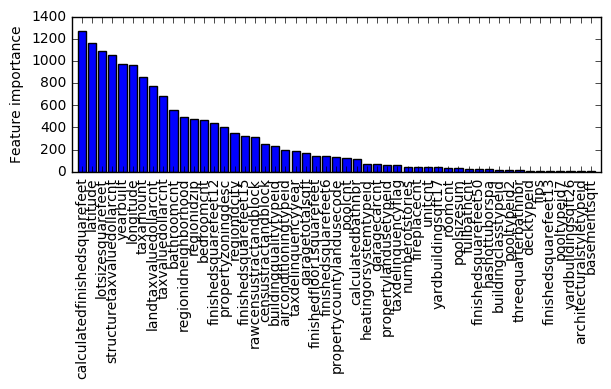

In [50]:
# show a graph of the feature importance
import matplotlib.pyplot as plt
import operator
%matplotlib inline

f_score = model.get_fscore()
importance = sorted(f_score.items(), key=operator.itemgetter(1), reverse=True)
print('of %d features the model considers %d of them significant' % (len(list(x_train)), len(importance)))
insignificant_features = set([item[0] for item in f_score.items()]).symmetric_difference(set(list(x_train)))
print('here are the insignificant features: %s' % sorted(list(insignificant_features)))

features = zip(*importance)[0]
scores = zip(*importance)[1]
x_pos = np.arange(len(features))
plt.figure()
plt.bar(x_pos, scores, align='center')
plt.xticks(x_pos, features, rotation='vertical')
plt.xlim(-1, len(x_pos))
plt.tight_layout()
plt.ylabel('Feature importance')
plt.show()

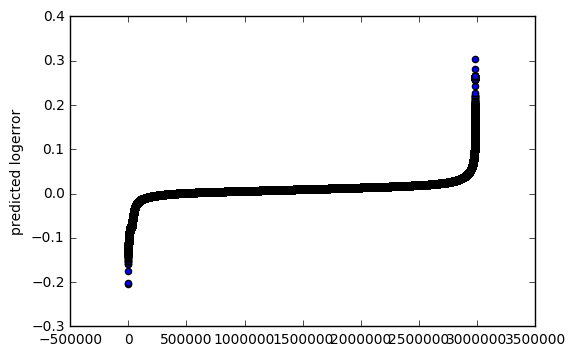

In [51]:
column_name = 'predicted logerror'
# visualize the error for the predicted results
fig, ax = plt.subplots()
predictions_copy = np.copy(predictions)
predictions_copy.sort()
ax.scatter(range(predictions_copy.size), predictions_copy)
plt.ylabel(column_name)
plt.show()